### <CENTER> Problem 3: ETL </CENTER>



The below given json file contains data related to orchestra, theirs concerts, works, artists, etc. Since the data is in nested JSON format, its not possible to conduct any analysis on the raw data.

[nested_data](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/98b0fa4b-2a85-40e0-af20-5a2785c55c92/Untitled.json)

You are required to:

1. Load the data and perform transformations to simply the data and store it a normalized manner into smaller tables which are easier to analyze
2. Prepare an ERD of the normalized data tables showing relationships between the various entities
3. Implement the transformation using python (can use libraries) and SQL both and submit two separate solutions

#### ERD

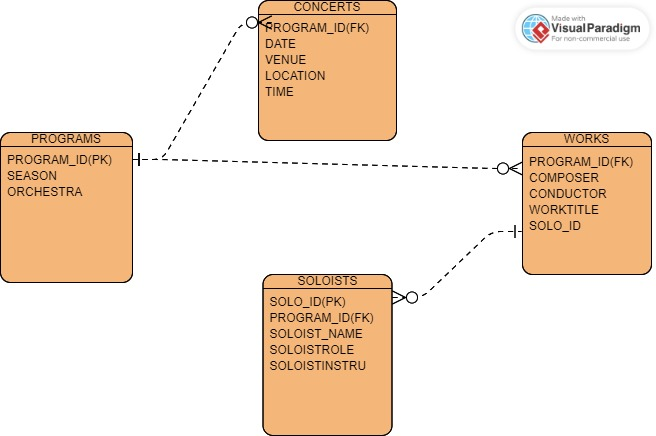

#### IMPORTING LIBRARIES

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

##### LOADING JSON FILE

###### PYTHON CODE


In [5]:
import json
import pandas as pd

# Step 1: Read the JSON file
with open(r'C:\Users\jagan\OneDrive\Desktop\New folder\Problem_03\nested_data.json', 'r') as file:
    data = json.load(file)




In [ ]:
# Step 2: Extract relevant information and perform transformations
# Assuming 'programs' is a list of dictionaries in the JSON data
normalized_data = []
for program in data['programs']:
    program_id = program['programID']
    season = program['season']
    orchestra = program['orchestra']

    # Extract and normalize concert information
    concerts = []
    for concert in program['concerts']:
        concert_date = concert['Date']
        concert_venue = concert['Venue']
        concert_location = concert['Location']
        concert_time = concert['Time']
        concerts.append({
            'programID': program_id,
            'Date': concert_date,
            'Venue': concert_venue,
            'Location': concert_location,
            'Time': concert_time,
        })

    # Extract and normalize works information
    works = []
    for work in program['works']:
        composer = work.get('composerName',None)
        conductor = work.get('conductorName', None)  # Use get() with a default value of None
        work_title = work.get('workTitle', None)
        works.append({
            'programID': program_id,
            'Composer': composer,
            'Conductor': conductor,
            'WorkTitle': work_title,
        })

    # Add the extracted information to the normalized data list
    normalized_data.append({
        'programID': program_id,
        'Season': season,
        'Orchestra': orchestra,
        'Concerts': concerts,
        'Works': works,
    })

# Step 3: Store the data in a suitable format (e.g., Pandas DataFrames)
# Create DataFrames for each entity
programs_df = pd.DataFrame(normalized_data)

In [6]:
programs_df

,programID,Season,Orchestra,Concerts,Works
0,3853,1842-43,New York Philharmonic,"[{'programID': '3853', 'Date': '1842-12-07T05:...","[{'programID': '3853', 'Composer': 'Beethoven,..."
1,5178,1842-43,New York Philharmonic,"[{'programID': '5178', 'Date': '1843-02-18T05:...","[{'programID': '5178', 'Composer': 'Beethoven,..."
2,10785,1842-43,Musicians from the New York Philharmonic,"[{'programID': '10785', 'Date': '1843-04-07T05...","[{'programID': '10785', 'Composer': 'Beethoven..."
3,5887,1842-43,New York Philharmonic,"[{'programID': '5887', 'Date': '1843-04-22T05:...","[{'programID': '5887', 'Composer': 'Beethoven,..."
4,305,1843-44,New York Philharmonic,"[{'programID': '305', 'Date': '1843-11-18T05:0...","[{'programID': '305', 'Composer': 'Beethoven, ..."
...,...,...,...,...,...
13949,14189,2016-17,Musicians from the New York Philharmonic,"[{'programID': '14189', 'Date': '2017-06-24T04...","[{'programID': '14189', 'Composer': 'Glass, P..."
13950,14146,2016-17,New York Philharmonic,"[{'programID': '14146', 'Date': '2017-07-02T04...","[{'programID': '14146', 'Composer': 'Dvorak, ..."
13951,14148,2016-17,New York Philharmonic,"[{'programID': '14148', 'Date': '2017-07-03T04...","[{'programID': '14148', 'Composer': 'Mahler, ..."
13952,14136,2016-17,New York Philharmonic,"[{'programID': '14136', 'Date': '2017-07-04T04...","[{'programID': '14136', 'Composer': 'Dvorak, ..."


In [7]:
concerts_df = pd.DataFrame([concert for program in normalized_data for concert in program['Concerts']])
concerts_df



,programID,Date,Venue,Location,Time
0,3853,1842-12-07T05:00:00Z,Apollo Rooms,"Manhattan, NY",8:00PM
1,5178,1843-02-18T05:00:00Z,Apollo Rooms,"Manhattan, NY",8:00PM
2,10785,1843-04-07T05:00:00Z,Apollo Rooms,"Manhattan, NY",8:00PM
3,5887,1843-04-22T05:00:00Z,Apollo Rooms,"Manhattan, NY",8:00PM
4,305,1843-11-18T05:00:00Z,Apollo Rooms,"Manhattan, NY",None
...,...,...,...,...,...
21602,14189,2017-06-24T04:00:00Z,Guild Hall,"East Hampton, NY",None
21603,14146,2017-07-02T04:00:00Z,Shanghai Symphony Hall,"Shanghai, CHINA",7:30PM
21604,14148,2017-07-03T04:00:00Z,Shanghai Symphony Hall,"Shanghai, CHINA",7:30PM
21605,14136,2017-07-04T04:00:00Z,Shanghai Symphony Hall--Chamber Hall,"Shanghai, CHINA",7:30PM


In [8]:
works_df = pd.DataFrame([work for program in normalized_data for work in program['Works']])
works_df

,programID,Composer,Conductor,WorkTitle
0,3853,"Beethoven, Ludwig van","Hill, Ureli Corelli","SYMPHONY NO. 5 IN C MINOR, OP.67"
1,3853,"Weber, Carl Maria Von","Timm, Henry C.",OBERON
2,3853,"Hummel, Johann",None,"QUINTET, PIANO, D MINOR, OP. 74"
3,3853,None,None,None
4,3853,"Weber, Carl Maria Von","Etienne, Denis G.",OBERON
...,...,...,...,...
82788,14136,"Feng, Shuya","Gersen, Joshua",MEMORIES OF MARNYI STONE
82789,14136,"Dvorak, Antonín","Gersen, Joshua","SYMPHONY NO. 9, E MINOR, OP.95 (FROM THE NEW W..."
82790,14147,"Copland, Aaron","Gilbert, Alan",QUIET CITY
82791,14147,"Marsalis, Wynton","Gilbert, Alan","JUNGLE, THE (SYMPHONY NO. 4)"


### DATA VISUALISATION 

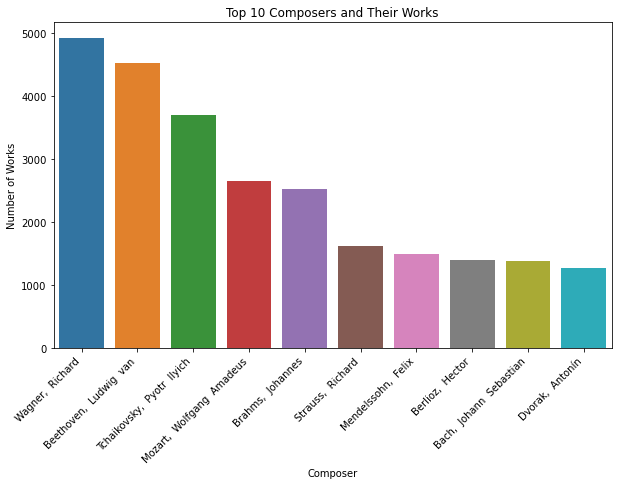

In [17]:
# Analysis 2: Top composers and their works
top_composers = works_df['Composer'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_composers.index, y=top_composers.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Composer')
plt.ylabel('Number of Works')
plt.title('Top 10 Composers and Their Works')
plt.show()

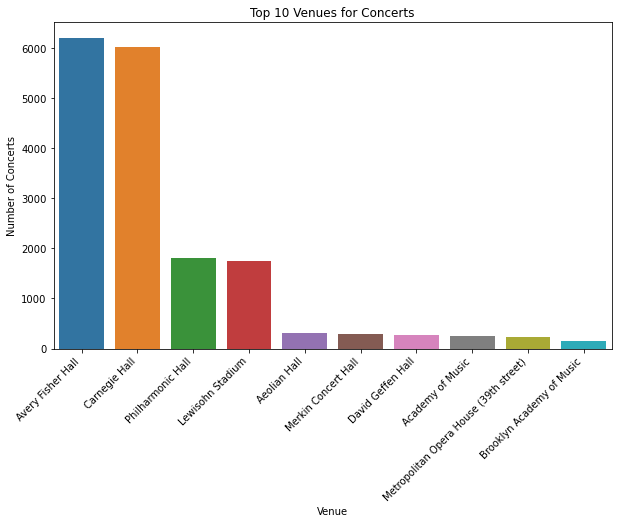

In [18]:
# Analysis 9: Venue analysis
top_venues = concerts_df['Venue'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_venues.index, y=top_venues.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Venue')
plt.ylabel('Number of Concerts')
plt.title('Top 10 Venues for Concerts')
plt.show()
